<a href="https://colab.research.google.com/github/sagarsp/AI-plays-flappy-bird-with-reinforcement-learning/blob/main/AI_plays_flappy_bird_with_reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "stable-baselines3[extra]"
!pip install "gymnasium[all]"
!pip install flappy-bird-gymnasium==0.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 45.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.3 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=8ef39170b2830c8891c5c4bef8b9e0718a4184bddd2907acda3ec8f6372dafad
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 50.5 MB/s eta 0:00

In [2]:
import flappy_bird_gymnasium
import gymnasium as gym
import time
import random

In [3]:
env = gym.make("FlappyBird-v0")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
episodes = 1
for episode in range(episodes):
  print("New Game")
  env.reset()
  terminated = False
  while not terminated:
    action = env.action_space.sample()
    obs, reward, terminated, _, info = env.step(action)
    #print (reward)
  env.close()


New Game


In [5]:
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt
env = gym.make("FlappyBird-v0")
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 1)

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


In [6]:
state = env.reset()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
obs, reward, terminated, info = env.step([env.action_space.sample()])

In [8]:
import os
from stable_baselines3 import PPO
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback

In [9]:
LOG_DIR = './logs'

In [10]:
#model = PPO('MlpPolicy', env, verbose=1, tensorboard_log = LOG_DIR, learning_rate=0.001,n_steps=128)
model = DQN('MlpPolicy', env, verbose=1, learning_rate=0.00005)

Using cuda device


In [11]:
model.learn(total_timesteps=4000000, log_interval=10000)

----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10000    |
|    fps              | 802      |
|    time_elapsed     | 1220     |
|    total_timesteps  | 978687   |
| train/              |          |
|    learning_rate    | 5e-05    |
|    loss             | 0.0428   |
|    n_updates        | 232171   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20000    |
|    fps              | 775      |
|    time_elapsed     | 2674     |
|    total_timesteps  | 2074677  |
| train/              |          |
|    learning_rate    | 5e-05    |
|    loss             | 0.213    |
|    n_updates        | 506169   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

In [12]:
model.save('dqn_testmodel')

In [13]:
model = DQN.load('dqn_testmodel')

In [14]:
import numpy as np
games_count = 100
total_rewards_list = np.zeros(games_count)
for i in range(games_count):
  state = env.reset()
  terminated = False
  total_reward = 0
  while not terminated:
    action, _ = model.predict(state)
    state, reward, terminated, info = env.step(action)
    total_reward += reward
  total_rewards_list[i] = total_reward[0]
  print(i,total_reward[0])

0 18.000029
1 27.500057
2 9.000002
3 13.500015
4 11.900009
5 25.300049
6 11.000006
7 13.800016
8 13.500015
9 13.500015
10 16.100021
11 15.70002
12 11.900009
13 11.300007
14 18.000029
15 18.000029
16 9.800005
17 10.000006
18 13.500015
19 18.000029
20 13.500015
21 14.300018
22 9.700005
23 13.700016
24 13.500015
25 25.100048
26 13.500015
27 13.500015
28 18.40003
29 11.400007
30 20.500034
31 9.300003
32 13.500015
33 13.500015
34 11.2000065
35 14.500019
36 13.500015
37 9.500004
38 13.500015
39 13.500015
40 13.500015
41 13.500015
42 11.400007
43 13.500015
44 11.300007
45 13.500015
46 13.500015
47 13.500015
48 23.000044
49 39.29997
50 23.000044
51 11.2000065
52 18.000029
53 23.000044
54 11.900009
55 18.000029
56 13.500015
57 11.900009
58 23.000044
59 9.000002
60 9.000002
61 37.899975
62 9.800005
63 9.600004
64 9.000002
65 9.900005
66 18.000029
67 13.500015
68 27.500057
69 11.2000065
70 10.000006
71 9.000002
72 15.70002
73 27.500057
74 9.000002
75 9.000002
76 13.500015
77 13.500015
78 13.50001

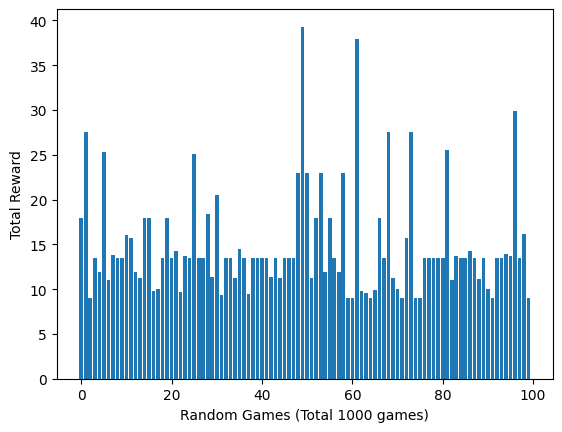

In [15]:
plt.bar(range(games_count),total_rewards_list)
plt.xlabel('Random Games (Total 1000 games)')
plt.ylabel('Total Reward')
plt.show()

In [16]:
# Set up fake display; otherwise rendering will fail
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

In [17]:
import base64
from pathlib import Path

from IPython import display as ipythondisplay


def show_videos(video_path="", prefix=""):
    """
    Taken from https://github.com/eleurent/highway-env

    :param video_path: (str) Path to the folder containing videos
    :param prefix: (str) Filter the video, showing only the only starting with this prefix
    """
    html = []
    for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append(
            """<video alt="{}" autoplay
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>""".format(
                mp4, video_b64.decode("ascii")
            )
        )
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

In [18]:
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv


def record_video(env_id, model, video_length=500, prefix="", video_folder="videos/"):
    """
    :param env_id: (str)
    :param model: (RL model)
    :param video_length: (int)
    :param prefix: (str)
    :param video_folder: (str)
    """
    env = gym.make("FlappyBird-v0", render_mode="rgb_array")
    env = DummyVecEnv([lambda: env])
    env = VecFrameStack(env, 1)
    #eval_env = DummyVecEnv([lambda: gym.make(env_id, render_mode="rgb_array")])
    # Start the video at step=0 and record 500 steps
    eval_env = VecVideoRecorder(
        env,
        video_folder=video_folder,
        record_video_trigger=lambda step: step == 0,
        video_length=video_length,
        name_prefix=prefix,
    )

    obs = eval_env.reset()
    for _ in range(video_length):
        action, _ = model.predict(obs)
        obs, _, _, _ = eval_env.step(action)

    # Close the video recorder
    eval_env.close()

In [19]:
record_video(env, model, video_length=5000, prefix="dqn-4M-FlappyBird-v0")

Saving video to /content/videos/dqn-4M-FlappyBird-v0-step-0-to-step-5000.mp4
Moviepy - Building video /content/videos/dqn-4M-FlappyBird-v0-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/videos/dqn-4M-FlappyBird-v0-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/dqn-4M-FlappyBird-v0-step-0-to-step-5000.mp4


In [20]:
show_videos("videos", prefix="dqn-4M-FlappyBird-v0-step-0-to-step-5000")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
